In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def make_cifar10(batch_size):
    transform = transforms.Compose(
        [transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])


    trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                            download=True, transform=transform)
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                            shuffle=True, num_workers=2)

    testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                        download=True, transform=transform)
    testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                            shuffle=False, num_workers=2)
    
    return trainset, trainloader, testset, testloader

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


Files already downloaded and verified
Files already downloaded and verified


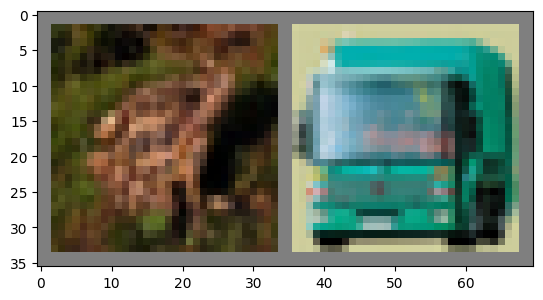

In [3]:
# 학습데이터 가져오기
trainset, trainloader, testset, testloader= make_cifar10(2)

# 학습용 이미지를 무작위로 가져오기
dataiter = iter(trainloader)
images, labels = next(dataiter)

# 이미지 보여주기
imshow(torchvision.utils.make_grid(images))
# 정답(label) 출력
# print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [4]:
import torch
from evaluate_cifar10 import evaluate
from unet.unet_model import UNet
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Change here to adapt to your data
# n_channels=3 for RGB images
# n_classes is the number of probabilities you want to get per pixel
model = UNet(n_channels=3, n_classes=3, bilinear=False)
model = model.to(memory_format=torch.channels_last)


model.to(device=device)
val_score = evaluate(model, testloader, device, False)


In [5]:
val_score

12.2058

In [4]:
import torch

def add_gaussian_noise(image, stddev=0.2):
    """
    Add Gaussian noise to an image tensor.

    Args:
        image (torch.Tensor): Input image tensor (batch_size x channels x height x width).
        stddev (float): Standard deviation of the Gaussian noise.

    Returns:
        torch.Tensor: Noisy image tensor with values clamped between 0 and 1.
    """
    # Generate random noise with the same size as the image
    noise = torch.randn_like(image) * stddev

    # Add the noise to the image
    noisy_image = image + noise

    # Clip the pixel values to be in the range [0, 1]
    noisy_image = torch.clamp(noisy_image, 0, 1)

    return noisy_image

In [21]:
def compare_image(original_image, noisy_image, prediction_image):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 3, 1)
    plt.title("Original Image")
    plt.imshow(original_image.squeeze().permute(1, 2, 0).numpy())
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.title("Noisy Image")
    plt.imshow(noisy_image.squeeze().permute(1, 2, 0).numpy())
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.title("Prediction_image")
    plt.imshow(prediction_image.squeeze().permute(1, 2, 0).numpy())
    plt.axis('off')

    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


len(batch):  2
batch[0]:  tensor([[[[ 0.8431,  0.7725,  0.8353,  ...,  0.4510,  0.4588,  0.5686],
          [ 0.7020,  0.6078,  0.6863,  ..., -0.3098, -0.1216,  0.0667],
          [ 0.6000,  0.5059,  0.5765,  ..., -0.6471, -0.3098, -0.1922],
          ...,
          [ 0.5843,  0.4667,  0.1765,  ..., -0.3255, -0.3333, -0.2000],
          [ 0.5373,  0.3569,  0.2157,  ..., -0.1294, -0.1137,  0.0118],
          [ 0.7569,  0.5922,  0.4039,  ...,  0.3725,  0.3490,  0.4118]],

         [[ 0.9137,  0.8745,  0.9137,  ...,  0.4667,  0.4745,  0.5843],
          [ 0.7490,  0.6941,  0.7490,  ..., -0.2627, -0.0980,  0.0902],
          [ 0.6392,  0.5922,  0.6471,  ..., -0.5765, -0.2627, -0.1608],
          ...,
          [ 0.6314,  0.5137,  0.2235,  ..., -0.3569, -0.2784, -0.1294],
          [ 0.5765,  0.3961,  0.2549,  ..., -0.1529, -0.0667,  0.0745],
          [ 0.7961,  0.6314,  0.4431,  ...,  0.3490,  0.3961,  0.4667]],

         [[ 0.9059,  0.9137,  0.9451,  ...,  0.4196,  0.3961,  0.5137],
    

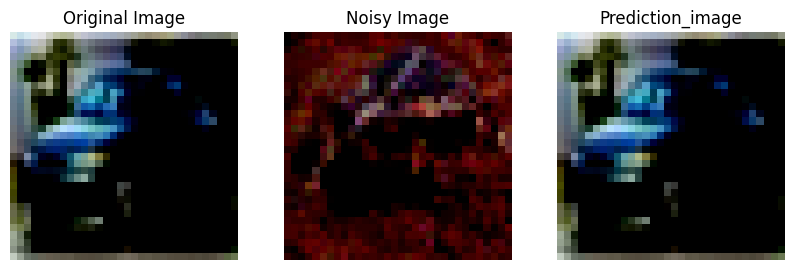

**동일 이미지 비교**
PSNR : 12.898420715473918


In [35]:
from skimage.metrics import peak_signal_noise_ratio, structural_similarity


i = 0
for batch in trainloader:
    if i== 1:
        break
    # print("batch : ", batch)
    print("len(batch): ",len(batch))
    print("batch[0]: ",batch[0])
    print("batch[1]: ",batch[1])
    print("batch[0].shape: ",batch[0].shape)
    print("type(batch[0]): ",type(batch[0]))
    print("batch[1].shape: ",batch[1].shape)
    # images, true_masks = batch, add_gaussian_noise(batch[0])
    images, true_masks = batch[0], add_gaussian_noise(images, 0.05)
    print(true_masks)
    print(type(true_masks))
    compare_image(images[0], true_masks[0], images[0])
    print("**동일 이미지 비교**")
    print("PSNR :", peak_signal_noise_ratio(np.array(images), np.array(true_masks)))
    i += 1

In [ ]:
def showOrigNoiseOut(orig, noise, denoise, num=10):
    import matplotlib.pyplot as plt 
    n = num
    plt.figure(figsize=(20, 6))

    for i in range(n):
        # display original
        ax = plt.subplot(3, n, i+1)
        imshow(orig[i])
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # display noisy image
        ax = plt.subplot(3, n, i +1 + n)
        imshow(noise[i])
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        
        # display denoised image
        ax = plt.subplot(3, n, i +1 + n + n)
        imshow(denoise[i])
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    
    plt.figtext(0.5,0.95, "ORIGINAL IMAGES", ha="center", va="top", fontsize=14, color="r")
    plt.figtext(0.5,0.65, "NOISY IMAGES", ha="center", va="top", fontsize=14, color="r")
    plt.figtext(0.5,0.35, " DENOISED RECONSTRUCTED IMAGES", ha="center", va="top", fontsize=14, color="r")
    plt.subplots_adjust(hspace = 0.5 )
    plt.show()

def imshow(img):
   plt.imshow(np.transpose(img, (1, 2, 0)))  # convert from Tensor image

In [ ]:
from skimage.metrics import peak_signal_noise_ratio, structural_similarity


In [ ]:
from skimage.metrics import peak_signal_noise_ratio, structural_similarity

print("**동일 이미지 비교**")
print("PSNR :", peak_signal_noise_ratio(hr_cat, hr_cat))

: 

In [47]:
val_score

tensor(0.0014, device='cuda:0')